# THE SPARKS FOUNDATION 

## Data Science & Business Analytics(GRIP DECEMBER 2022)

### Task-3 Exploratory Data Analytics-Retail 

### Done by- Ayesha Saniya Mohammed

### Aim: To perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'

#### Importing  necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

#### Reading the data from source

In [3]:
data=pd.read_csv('C:\\Users\\Ayesha\\Downloads\\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Exploring the details about Dataset

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
data['Ship Mode'].unique().shape

(4,)

In [8]:
for i in data.columns:
    print('Number of unique categories in',i+'is',data[i].nunique())

Number of unique categories in Ship Modeis 4
Number of unique categories in Segmentis 3
Number of unique categories in Countryis 1
Number of unique categories in Cityis 531
Number of unique categories in Stateis 49
Number of unique categories in Postal Codeis 631
Number of unique categories in Regionis 4
Number of unique categories in Categoryis 3
Number of unique categories in Sub-Categoryis 17
Number of unique categories in Salesis 5825
Number of unique categories in Quantityis 14
Number of unique categories in Discountis 12
Number of unique categories in Profitis 7287


#### Checking for outliers

<AxesSubplot:>

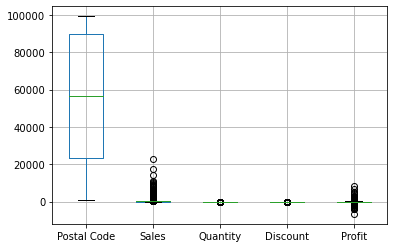

In [9]:
data.boxplot()

#### Regionwise data distribution of other parameters

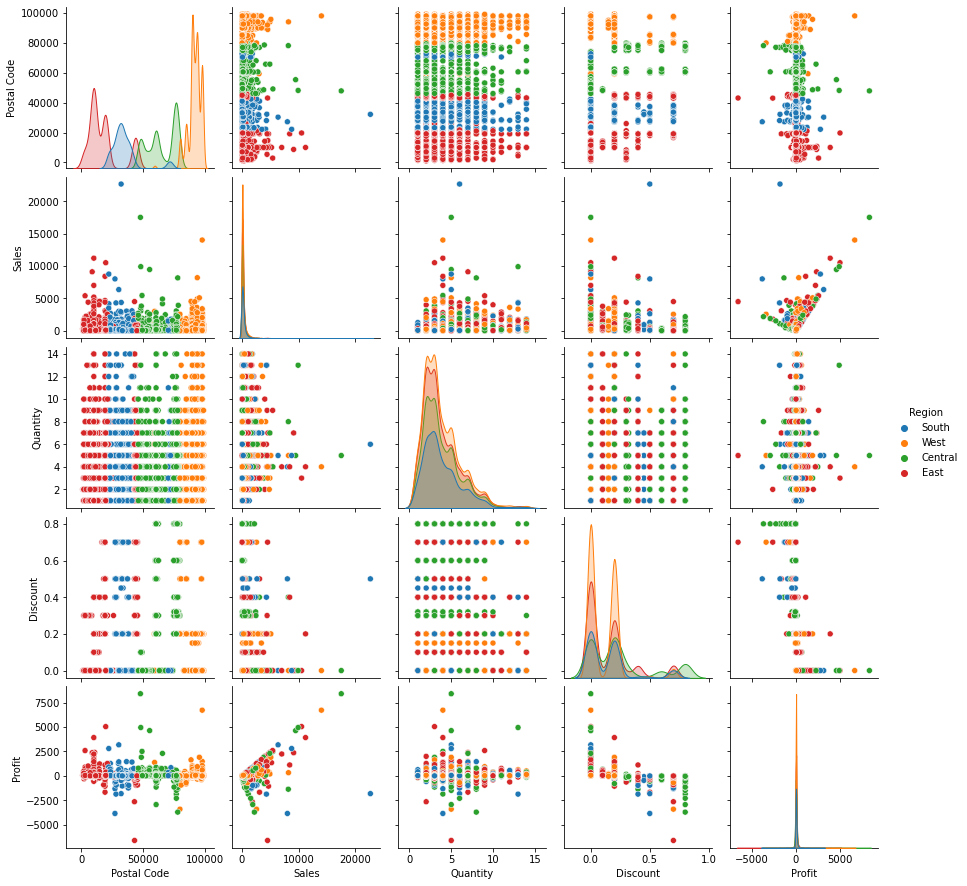

In [12]:
sns.pairplot(data=data,hue='Region')
plt.show()

##### conclusion: From above graph we can see the relation different parameters. we can see regionwise performaance of different parameters

### Ship Mode and it's impact on sales

#### Shipmodewise totalsales

In [14]:
x=data['Ship Mode'].unique()
x.sort()
x

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [15]:
y=data.groupby(['Ship Mode'])['Sales'].sum()
y

Ship Mode
First Class       3.514284e+05
Same Day          1.283631e+05
Second Class      4.591936e+05
Standard Class    1.358216e+06
Name: Sales, dtype: float64

#### Shipmodewise totalprofit

In [16]:
ypro=data.groupby(['Ship Mode'])['Profit'].sum()
ypro

Ship Mode
First Class        48969.8399
Same Day           15891.7589
Second Class       57446.6354
Standard Class    164088.7875
Name: Profit, dtype: float64

#### Shipmodewise totaldiscount

In [17]:
ydisc=data.groupby(['Ship Mode'])['Discount'].sum()
ydisc

Ship Mode
First Class       253.17
Same Day           82.75
Second Class      270.15
Standard Class    955.02
Name: Discount, dtype: float64

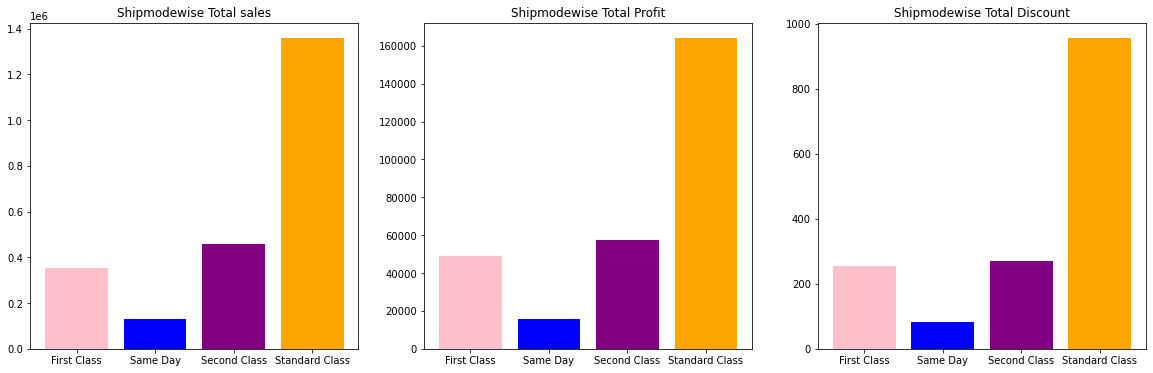

In [19]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))
ax1.bar(x,y,color=['pink','blue','purple','orange'])
ax2.bar(x,ypro,color=['pink','blue','purple','orange'])
ax3.bar(x,ydisc,color=['pink','blue','purple','orange'])
ax1.set_title('Shipmodewise Total sales')
ax2.set_title('Shipmodewise Total Profit')
ax3.set_title('Shipmodewise Total Discount')
plt.show()


#### conclusion:1 the graph shows that sales for the shipmode of standard class is having more sales as compare to others
  ####   conclusion :2 We got more profit in standard class shipmode,so we have to use this stategies to improve our sales and profit 

In [20]:
x=data['Ship Mode'].unique()
x.sort()
x

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

#### shipmodewise average sales

In [21]:
y=data.groupby(['Ship Mode']).agg({'Sales':np.average})
y=y.iloc[:,-1]
y

Ship Mode
First Class       228.497024
Same Day          236.396179
Second Class      236.089239
Standard Class    227.583067
Name: Sales, dtype: float64

#### shipmodewise average profit

In [22]:
yprof=data.groupby(['Ship Mode']).agg({'Profit':np.average})
yprof=yprof.iloc[:,-1]
yprof

Ship Mode
First Class       31.839948
Same Day          29.266591
Second Class      29.535545
Standard Class    27.494770
Name: Profit, dtype: float64

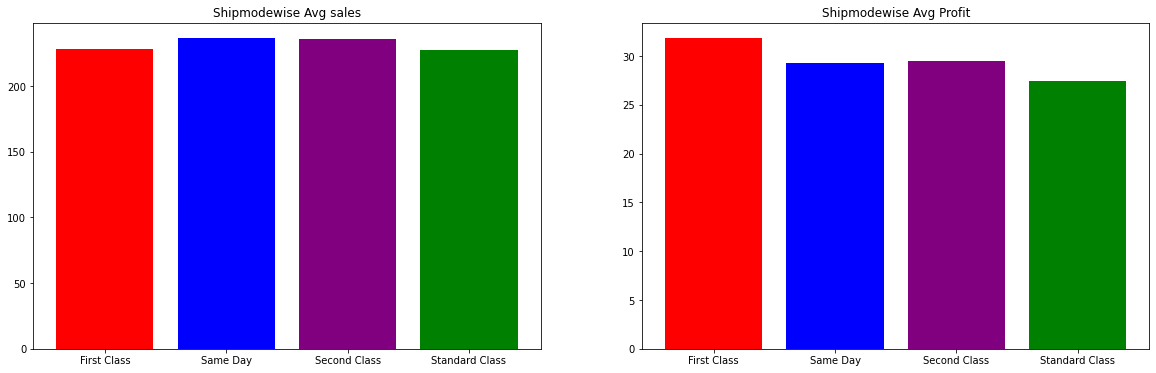

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
ax1.bar(x,y,color=['red','blue','purple','green'])
ax2.bar(x,yprof,color=['red','blue','purple','green'])
ax1.set_title('Shipmodewise Avg sales')
ax2.set_title('Shipmodewise Avg Profit')
plt.show()


#### conclusion:1 the graph shows that average sales and average profit  for the shipmode of standard class is having less average               and average  profit  as compare to others
  ####   conclusion :2 We have to think about about this mode and we have to think how we can improve average sales and profit  in standard class

### segmentwise it's sales and it's impact

#### Segmentwise total sales

In [24]:
x1=data['Segment'].unique()
x1

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [25]:
y1=data.groupby(['Segment'])['Sales'].sum()
y1

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

#### Segmentwise total sales

In [26]:
y1pro=data.groupby(['Segment'])['Profit'].sum()
y1pro

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

#### Segmentwise total discount

In [27]:
y1disc=data.groupby(['Segment'])['Discount'].sum()
y1disc

Segment
Consumer       820.91
Corporate      477.85
Home Office    262.33
Name: Discount, dtype: float64

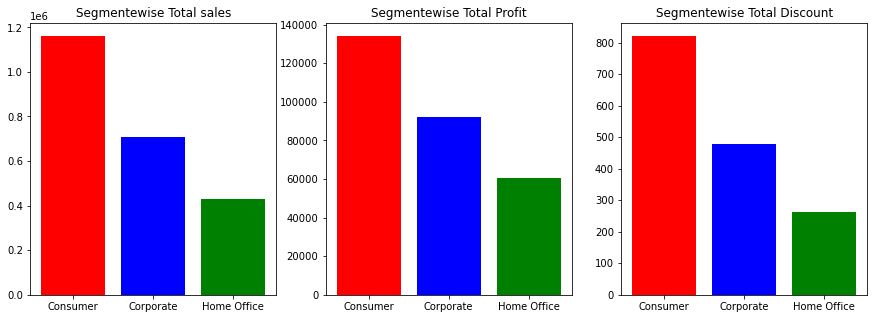

In [28]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
ax1.bar(x1,y1,color=['red','blue','green'])
ax2.bar(x1,y1pro,color=['red','blue','green'])
ax3.bar(x1,y1disc,color=['red','blue','green'])
ax1.set_title('Segmentewise Total sales')
ax2.set_title('Segmentewise Total Profit')
ax3.set_title('Segmentewise Total Discount')
plt.show()


#### conclusion :1 from the above graphs we can say that the consumer segment performance is very good and also for coorporate segment
#### conclusion :2 As we can see here the consumer segment is performing very good because we gave discounts on that products
#### conclusion : 3 So we have to give some disciunt on cooporate and home office segment products also so we can increase the profit ans sales

#### segmentwise average sales

In [29]:
x1=data['Segment'].unique()
x1

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [30]:
y1=data.groupby(['Segment']).agg({'Sales':np.average})
y1=y1.iloc[:,-1]
y1

Segment
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Sales, dtype: float64

#### segmentwise average profit

In [31]:
y1pro=data.groupby(['Segment']).agg({'Profit':np.mean})
y1pro=y1pro.iloc[:,-1]
y1pro

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

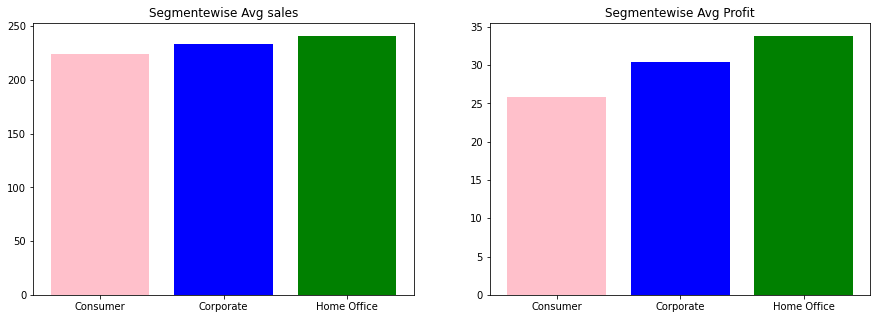

In [32]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.bar(x1,y1,color=['pink','blue','green'])
ax2.bar(x1,y1pro,color=['pink','blue','green'])
ax1.set_title('Segmentewise Avg sales')
ax2.set_title('Segmentewise Avg Profit')
plt.show()

#### conclusion :1 From the above graphs we can say that the average sales and profit for home office is good then other two segments
#### conclusion : 2 Use the strategies of selling the home office product to increase the sales of consumer and coorporate segment
    

### Sub-categoriwise order counts

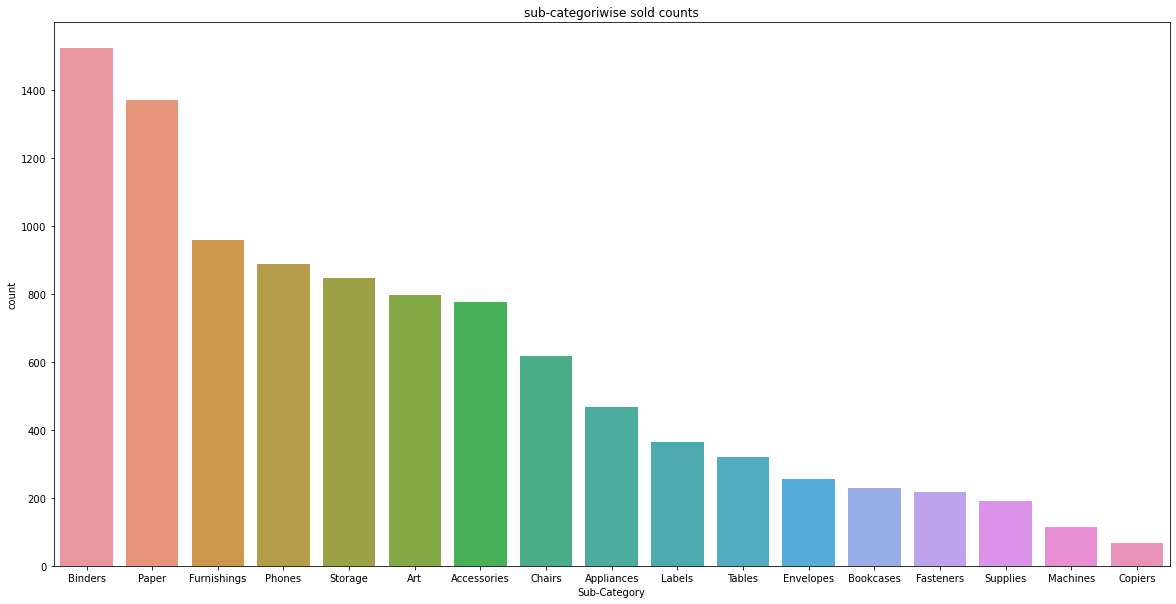

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Sub-Category'],orient='h',order=(data['Sub-Category'].value_counts()).index)
plt.title('sub-categoriwise sold counts')
plt.show()

#### conclusion: By looking at above graph we can say 80% of orders are for 8 categories

#### city-wise performance of orders counts

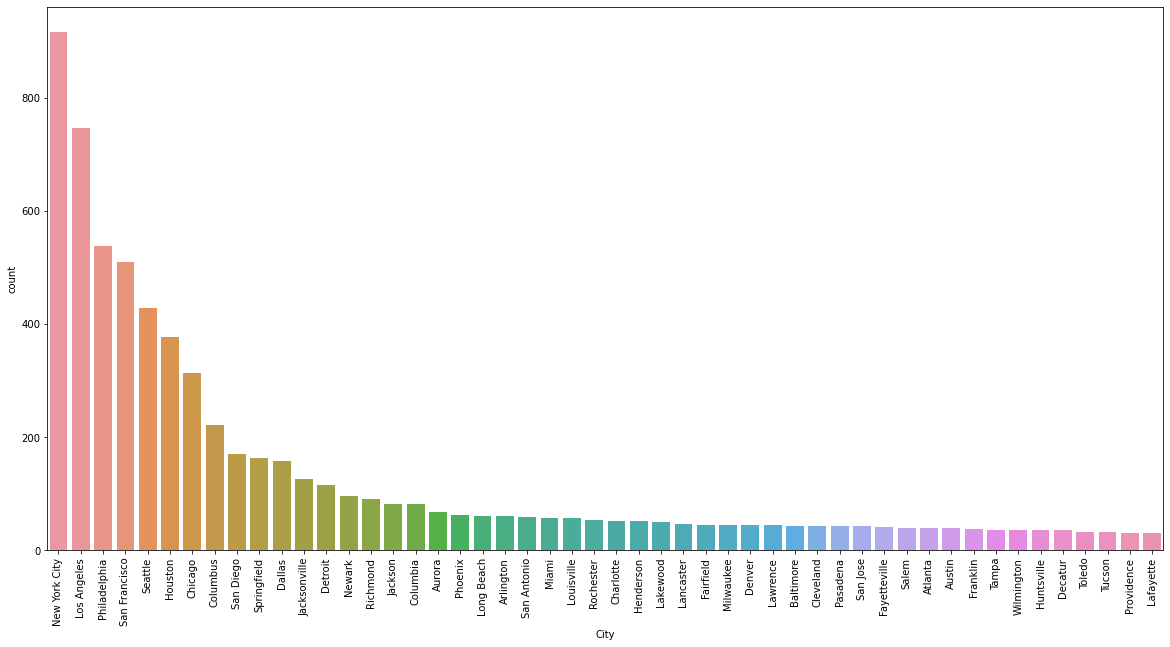

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['City'],orient='h',order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

#### conclusion: By looking at above graph we can say 80% of orders are coming from 7-8 cities only

#### city-wise performance of orders counts

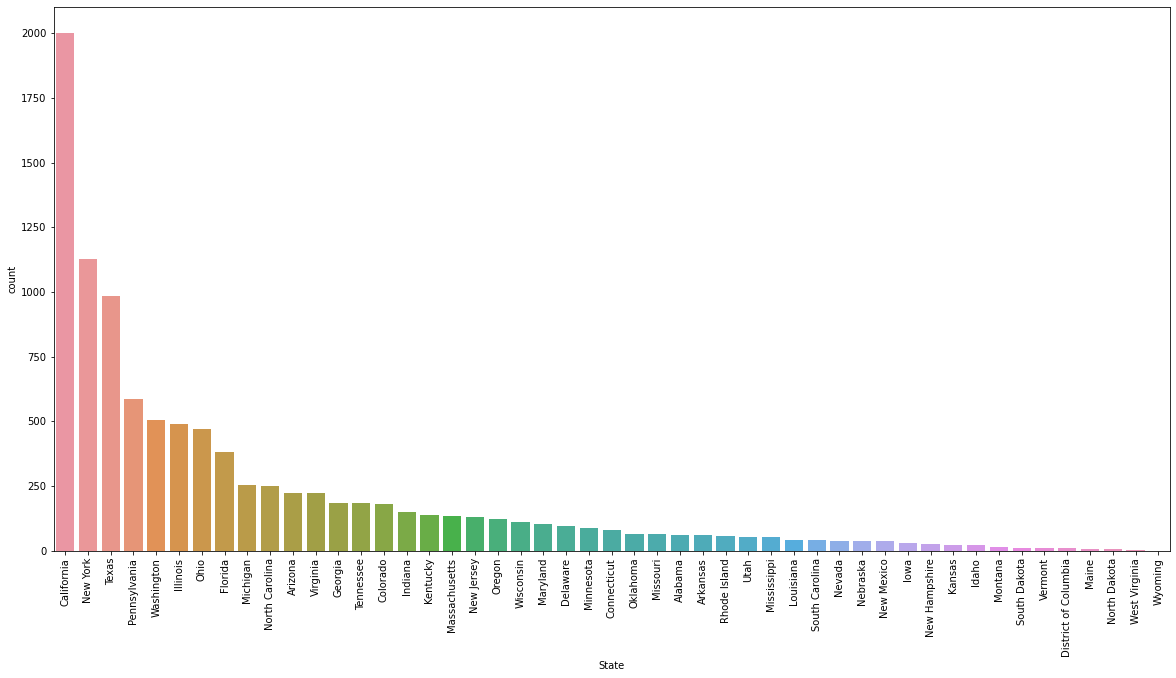

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['State'],orient='h',order=(data['State'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

#### conclusion: By looking at above graph we can say 80% of orders are from 7 states only

#### Regionwise total sales and profit performance

In [36]:
y2=data.groupby(['Region'])['Sales'].sum()
y2

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [37]:
y2prof=data.groupby(['Region'])['Profit'].sum()
y2prof

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

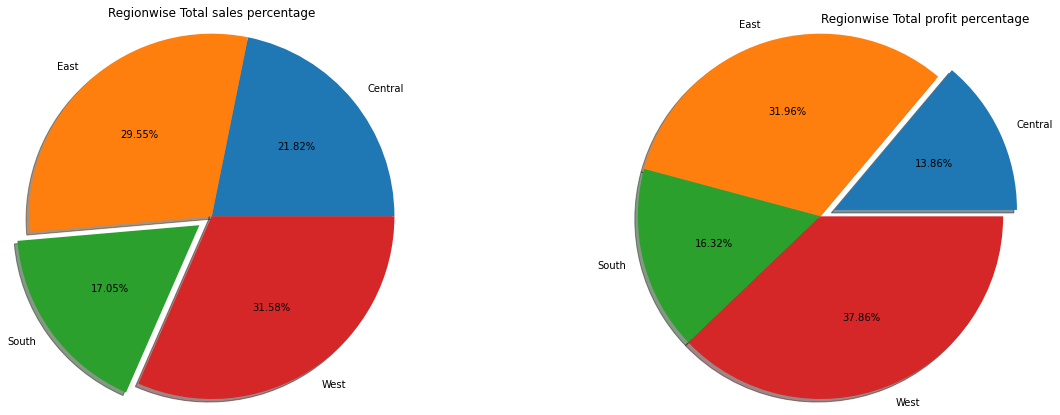

In [68]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
ax1.pie(y2,explode=[0,0,0.1,0],labels=['Central','East','South','West'],autopct='%1.2f%%',shadow=True,radius=1.2)
ax2.pie(y2prof,explode=[0.1,0,0,0],labels=['Central','East','South','West'],autopct='%1.2f%%',shadow=True,radius=1.2)
ax1.set_title('Regionwise Total sales percentage',fontdict={'verticalalignment':'bottom'})
ax2.set_title('Regionwise Total profit percentage',fontdict={'verticalalignment':'top','horizontalalignment':'left'})
plt.show()

#### Regionwise average sales

In [69]:
y2=data.groupby(['Region']).agg({'Sales':np.average})
y2=y2.iloc[:,-1]
y2

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

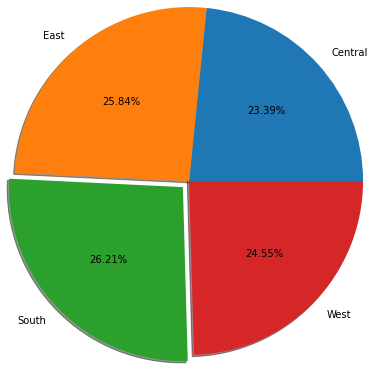

In [71]:
plt.pie(y2,explode=[0,0,0.1,0],labels=['Central','East','South','West'],autopct='%1.2f%%',shadow=True,radius=2,counterclock=45,)
plt.show()

#### Category-wise sales performance

In [72]:
y3=data.groupby(['Category'])['Sales'].sum()
y3

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

#### Category-wise profit performance

In [73]:
y3prof=data.groupby(['Category'])['Profit'].sum()
y3prof

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

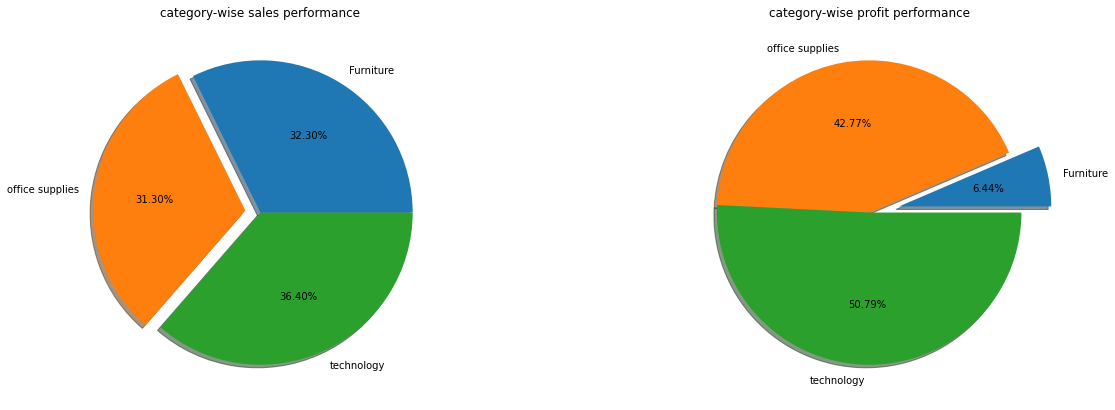

In [74]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,7))
ax1.pie(y3,explode=[0,0.1,0],labels=['Furniture','office supplies','technology'],autopct='%1.2f%%',shadow=True,radius=1,counterclock=90)
ax2.pie(y3prof,explode=[0.2,0,0],labels=['Furniture','office supplies','technology'],autopct='%1.2f%%',shadow=True,radius=1,counterclock=90)
ax1.set_title('category-wise sales performance')
ax2.set_title('category-wise profit performance')
plt.show()

#### Category-wise average sales performance

In [76]:
y3=data.groupby(['Category']).agg({'Sales':np.average})
y3=y3.iloc[:,-1]
y3

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

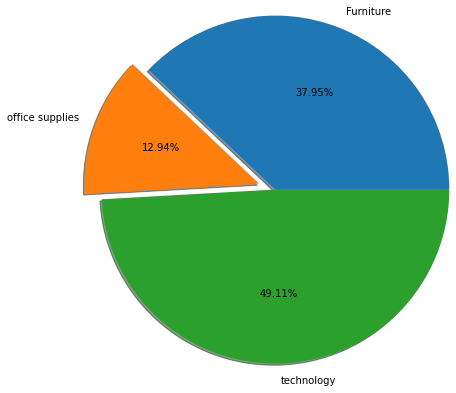

In [83]:
plt.pie(y3,explode=[0,0.2,0],labels=['Furniture','office supplies','technology'],autopct='%1.2f%%',shadow=True,radius=2,counterclock=90,)
plt.show()

#### Sub-Categorywise sales performance

In [84]:
x4=data['Sub-Category'].unique()
x4.sort()
x4=print(x4)
x4

['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Fasteners' 'Furnishings' 'Labels' 'Machines' 'Paper'
 'Phones' 'Storage' 'Supplies' 'Tables']


In [85]:
x4=np.array(['Accessories','Appliances','Art','Binders','Bookcases','chairs','copiers','envelopes','fasteners','Furnishings','Labels','Machines','paper','Phones','Storage','Supplies','Tables'])

In [87]:
y4=data.groupby(['Sub-Category'])['Sales'].sum()
y4

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

#### Sub-Categorywise profit performance

In [88]:
y4prof=data.groupby(['Sub-Category'])['Profit'].sum()
y4prof

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [89]:
xpos=np.arange(len(x4))
xpos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

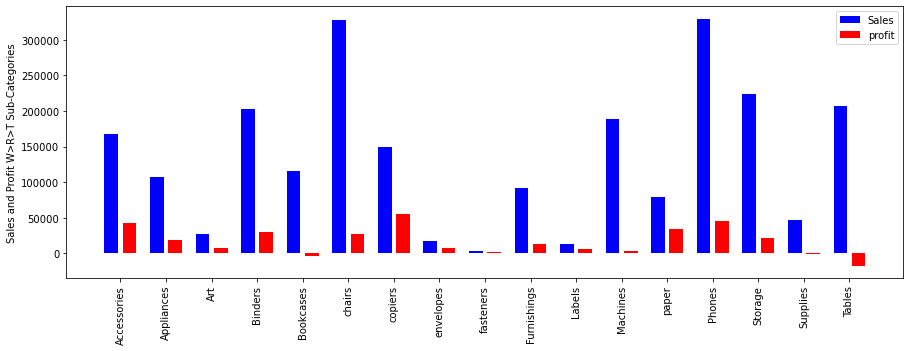

In [90]:
fig,(ax1)=plt.subplots(1,figsize=(15,5))
plt.xticks(xpos,x4,rotation=90)
ax1.bar(xpos-0.2,height=y4,color=['b'],width=0.3,label='Sales')
ax1.bar(xpos+0.2,height=y4prof,color=['r'],width=0.3,label='profit')
plt.xlabel=('sub=Categories')
plt.ylabel('Sales and Profit W>R>T Sub-Categories')
plt.legend()
plt.show()

#### Sub-Categorywise average sales 

In [91]:
y4=data.groupby(['Sub-Category']).agg({'Sales':np.average})
y4=y4.iloc[:,-1]
y4

Sub-Category
Accessories     215.974604
Appliances      230.755710
Art              34.068834
Binders         133.560560
Bookcases       503.859633
Chairs          532.332420
Copiers        2198.941618
Envelopes        64.867724
Fasteners        13.936774
Furnishings      95.825668
Labels           34.303055
Machines       1645.553313
Paper            57.284092
Phones          371.211534
Storage         264.590553
Supplies        245.650200
Tables          648.794771
Name: Sales, dtype: float64

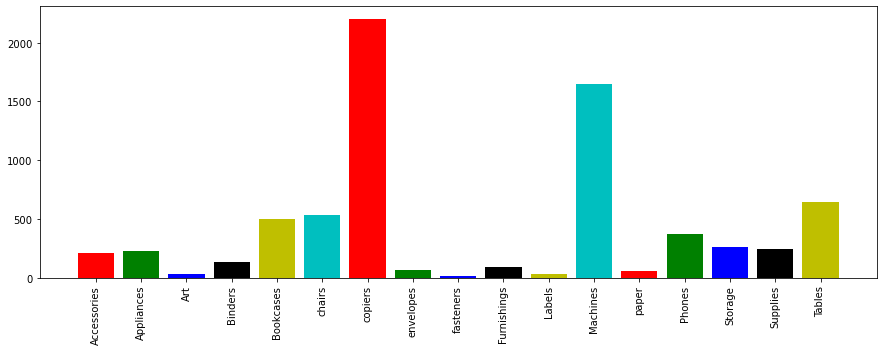

In [92]:
fig,(ax1)=plt.subplots(1,figsize=(15,5))
ax1.bar(x=x4,height=y4,color=['r','g','b','k','y','c','r','g','b','k','y','c','r','g','b','k','y'])
plt.xticks(rotation=90)
plt.show()

#### Conclusion :1 From above graph we can say that copiers and machines is having more average sales than other sub-categories 
#### conclusion :2 so we can use the stategies of selling machine and copiers for other sub-categories so we can increase the average sales of other categories also

## THANK YOU